In [ ]:
import datetime as dt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

from datetime import datetime, timedelta

import os
import gc
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import datetime
from tqdm import tqdm
from matplotlib.patches import Rectangle
import warnings

import seaborn as sns

from sklearn import svm
from sklearn.datasets import  make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples

from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/k8s/datasets/nabout.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df

,cpu_usage,net_usage,disk_usage,anomaly
timestamp,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True
2014-02-14 14:45:00,0.134,249894.0,0.0,False
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True
...,...,...,...,...
2014-03-13 14:04:00,0.066,219813.0,7878250.0,False
2014-03-13 14:09:00,0.068,207644.0,107195000.0,True
2014-03-13 14:14:00,0.134,204319.0,44328600.0,False


In [ ]:
for column in df.columns:
    fig = px.line(df, x=df.index, y=[column], title='AWS ' + column, template = 'plotly_dark')
    fig.show()

# Local Outlier Factor PyOD

In [ ]:
dataframe = df.copy()
dataframe.head()

,cpu_usage,net_usage,disk_usage,anomaly
timestamp,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True
2014-02-14 14:45:00,0.134,249894.0,0.0,False
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True


In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=0fd1cefe89c42bf8c27d0e0b4a8cd4bb4c5816ac1af6aa886d084c36fa7c1864
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [ ]:
from pyod.models.lof import LOF

random_state = np.random.RandomState(15)     # A fixed values is assigned, then no matter how many time you execute your code,values generated would be the same
#Does this mean that later on the code the outliers 5% higher than maximum value of dataset?
classifiers = {
        'Local Outlier Factor':LOF(n_neighbors=10, contamination=0.05)
}

In [ ]:
column_usage = 'cpu_usage'
X = dataframe[[column_usage]].values.reshape(-1,1)

In [ ]:
X

array([[0.132],
       [0.134],
       [0.134],
       ...,
       [0.134],
       [0.068],
       [0.068]])

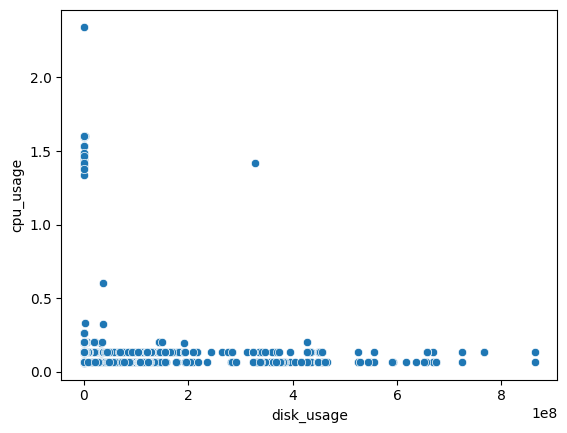

In [ ]:
sns.scatterplot(
        df,
        x='disk_usage',
        y='cpu_usage'
    )
plt.show()

In [ ]:
from scipy import stats
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)


    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    # copy of dataframe
    dfx = dataframe[[column_usage]]
    dfx['outlier'] = y_pred.tolist()

    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)

y = dfx['outlier'].values.reshape(-1,1)

OUTLIERS :  46 INLIERS :  7729 Local Outlier Factor


In [ ]:
dfx

,cpu_usage,outlier
timestamp,,
2014-02-14 14:30:00,0.132,0
2014-02-14 14:35:00,0.134,0
2014-02-14 14:40:00,0.134,0
2014-02-14 14:45:00,0.134,0
2014-02-14 14:50:00,0.134,0
...,...,...
2014-03-13 14:04:00,0.066,0
2014-03-13 14:09:00,0.068,0
2014-03-13 14:14:00,0.134,0


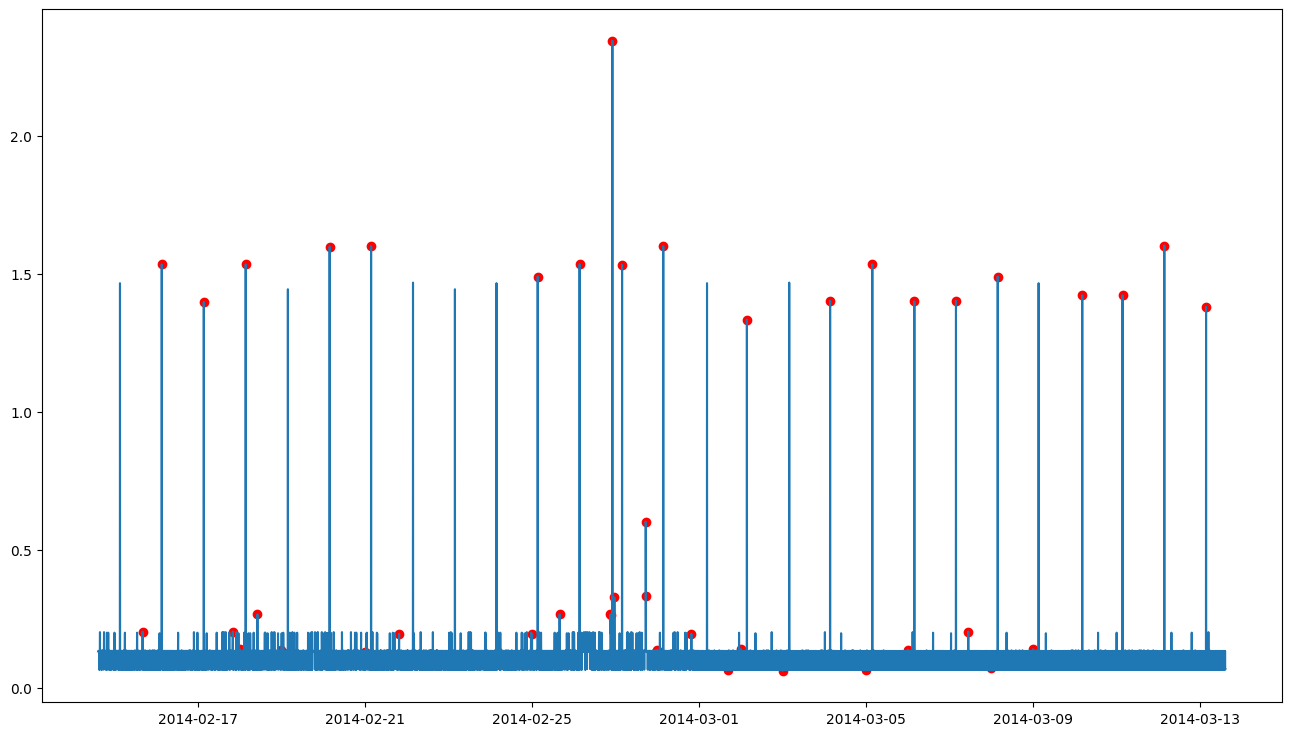

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

In [ ]:
# Define colors for anomalies and non-anomalies
colors = ['green' if a == 1 else 'red' for a in y_pred]

# Create a scatter plot of the data with anomalies highlighted in red
fig = go.Figure(data=go.Scatter(x=dfx.index, y=dfx[column_usage],
                                 mode='markers', marker=dict(color=colors, size=3)))

# Set the title and axis labels for the plot
fig.update_layout(title=dict(text='Isolation Forest Anomaly prediction', x=0.5),
                  yaxis_title='Value',
                  xaxis_title='Timestamp')

# Show the plot
fig.show()

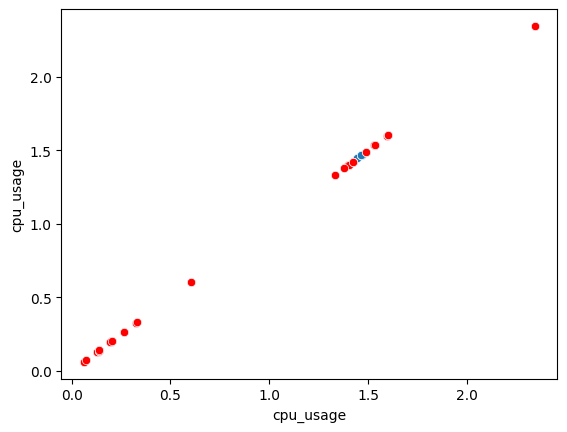

In [ ]:
sns.scatterplot(
        df,
        x=column_usage,
        y=column_usage
    )


sns.scatterplot(
        dfx.loc[dfx.outlier == 1],
        x=column_usage,
        y=column_usage,
        color='red'
    )
plt.show()

# Metrics


In [ ]:
y_pred = y_pred == 0
dfx['name'] = y_pred
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
p_values = {}
p_stats_ = {}
percent = {}
silhoutte = {}
calinski_harabasz = {}
davies_bouldin = {}

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

cols_in = [column_usage]

In [ ]:
dfx['name'].value_counts()

True     7729
False      46
Name: name, dtype: int64

In [ ]:
#percent anomaly
dist = dfx['name'].value_counts(normalize=True)
print(dist)
percent['name'] = dist.loc[True]

True     0.994084
False    0.005916
Name: name, dtype: float64


In [ ]:
#silhouette conficient samples non-anomaly
labels = [1 if i == True else 2 for i in dfx['name']]
dfx['silhouette_zcore_'] = silhouette_samples(df[[column_usage]], labels)
silhoutte['name'] = dfx[dfx['name']]['silhouette_zcore_'].mean()

In [ ]:
#ks coeficient
normal = dfx.loc[dfx['name'] == False, [column_usage]]
anomaly = dfx.loc[dfx['name'] == True, [column_usage]]
for col_in in tqdm(cols_in):
  if len(normal)>0 and len(anomaly)>0:
    stats_, pvalue = stats.kstest(normal[col_in], anomaly[col_in])
    p_values[col_in+'_'] = pvalue
    p_stats_[col_in+'_'] = stats_

100%|██████████| 1/1 [00:00<00:00, 150.04it/s]


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(df[[column_usage]], labels)
calinski_harabasz['name'] = round(ch_index, 3)
print("Calinski-Harabasz Index:", round(ch_index, 3))

Calinski-Harabasz Index: 3458.337


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[[column_usage]], labels)
davies_bouldin['name'] = round(dbi, 3)
print("Davies-Bouldin Index:", round(dbi, 3))

Davies-Bouldin Index: 1.034


pvalue
  svm_algorithm        pvalue
0    cpu_usage_  5.291635e-35
{'cpu_usage_': 5.291634782344456e-35}


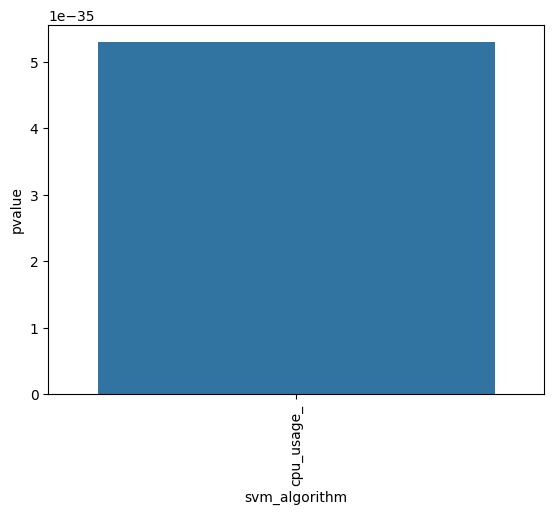

statistics
  svm_algorithm  statistics
0    cpu_usage_    0.827254
{'cpu_usage_': 0.8272542147867714}


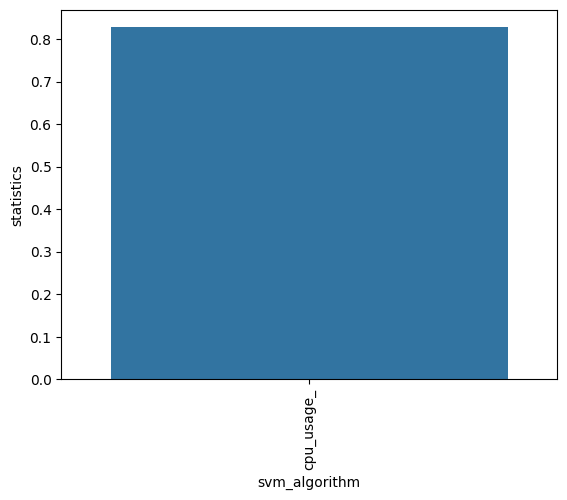

percent
  svm_algorithm   percent
0          name  0.994084
{'name': 0.9940836012861737}


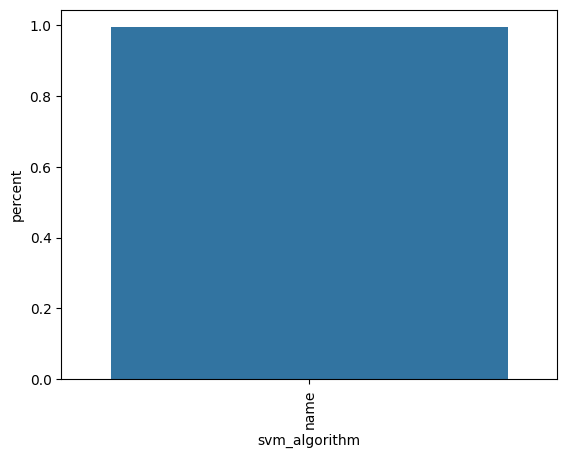

silhoutte
  svm_algorithm  silhoutte
0          name   0.942595
{'name': 0.9425949346425045}


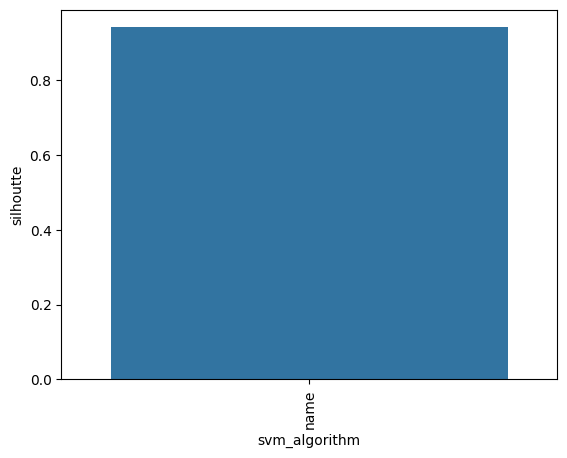

calinski_harabasz
  svm_algorithm  calinski_harabasz
0          name           3458.337
{'name': 3458.337}


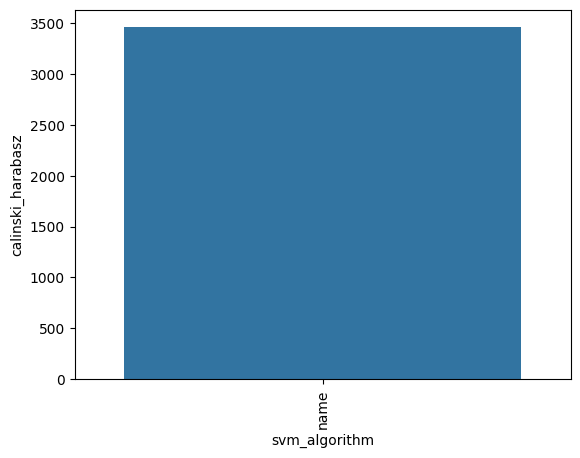

davies_bouldin
  svm_algorithm  davies_bouldin
0          name           1.034
{'name': 1.034}


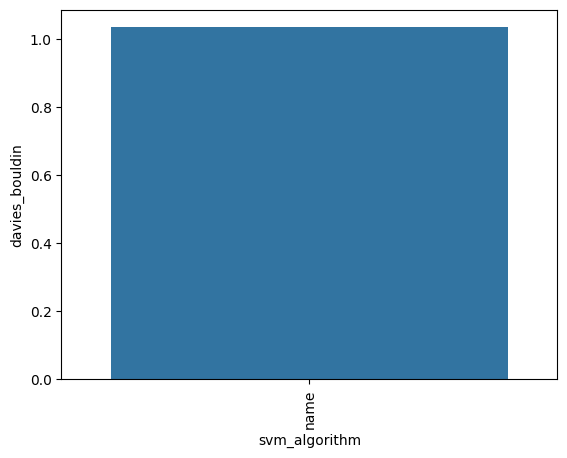

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name)
    df_values =  pd.DataFrame([dictionary])
    df_values = df_values.T
    df_values.reset_index(inplace=True)
    df_values.columns = ['svm_algorithm', name]
    print(df_values)
    print(dictionary)

    sns.barplot(data=df_values, x='svm_algorithm', y=name)
    plt.xticks(df_values.index, df_values['svm_algorithm'].values, rotation=90)
    plt.show()

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name + ': ' + str(np.array(list(dictionary.values())).mean()))

pvalue: 5.291634782344456e-35
statistics: 0.8272542147867714
percent: 0.9940836012861737
silhoutte: 0.9425949346425045
calinski_harabasz: 3458.337
davies_bouldin: 1.034


In [ ]:
svm_df = pd.DataFrame()
svm_df['anomaly']  = [1 if i==True else 0 for i in df.anomaly]

svm_f1 = f1_score(dfx['outlier'], svm_df['anomaly'])
print(f'One Class SVM F1 Score : {round(svm_f1 * 100,2)}%')

One Class SVM F1 Score : 12.43%
